# Day 3 — Loss Functions & Optimizers

## Step 1: Load Dataset
We'll use MNIST for comparing optimizers.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers #type:ignore
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

## Step 2: Define Model
A simple 2-layer Dense NN (ReLU + Softmax).

In [2]:
def build_model():
    return keras.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])


## Step 3: Train with Different Optimizers
We compare SGD, SGD+Momentum, RMSProp, and Adam.

In [3]:
optimizers = {
    "SGD": "sgd",
    "SGD+Momentum": keras.optimizers.SGD(momentum=0.9),
    "RMSProp": "rmsprop",
    "Adam": "adam"
}

histories = {}
results = {}

for name, opt in optimizers.items():
    model = build_model()
    model.compile(optimizer=opt,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    print(f"\nTraining with {name}")
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=0,
                        validation_data=(x_test, y_test))
    histories[name] = history
    results[name] = model.evaluate(x_test, y_test, verbose=0)[1]


d:\40-Days-DL-MLOps\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training with SGD

Training with SGD+Momentum

Training with RMSProp

Training with Adam


## Step 4: Plot Validation Accuracy

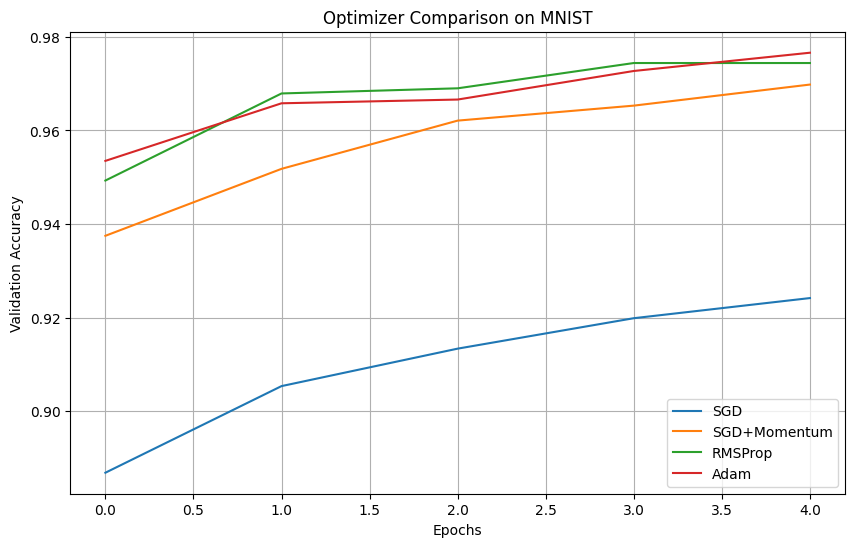

In [4]:
plt.figure(figsize=(10,6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.title("Optimizer Comparison on MNIST")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Results

In [5]:
for k,v in results.items():
    print(f"{k}: {v:.4f}")

SGD: 0.9242
SGD+Momentum: 0.9698
RMSProp: 0.9744
Adam: 0.9766
